In [1]:
# Imports
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import Regularizer

In [2]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Regularization in TensorFlow

In mathematics, statistics, and computer science, particularly in machine learning and inverse problems, regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting.

This means that we add some extra information in order to solve a problem and to prevent overfitting.

Overfitting simply means that our Machine Learning Model is trained on some data, and it will work extremely well on that data, but it will fail to generalize on new unseen examples.

We can see overfitting in this simple example



***
## Preparing Dataset 

***

In [3]:
# The path of the main directory
current_dir = '/content/drive/MyDrive/BUITEMS/DeepLearning/Datasets/Cat_Dog_data/'

# The path of the train directory
train_dir = os.path.join(current_dir, 'train')

# The path of the test directory
test_dir = os.path.join(current_dir, 'test')

# The path of the dog directory inside train sub-directory
train_dir_dog = os.path.join(train_dir, 'dog')

# The path of the cat directory inside train sub-directory
train_dir_cat = os.path.join(train_dir, 'cat')

# The path of the dog directory inside test sub-directory
test_dir_dog = os.path.join(test_dir, 'dog')

# The path of the cat directory inside test sub-directory
test_dir_cat = os.path.join(test_dir, 'cat')

# creating a list (train_cat_image_names) which contains the names of cats' pictures in the train directory
train_cat_image_names = os.listdir(train_dir_cat)

# creating a list (train_dog_image_names) which contains the names of dogs' pictures in the train directory
train_dog_image_names = os.listdir(train_dir_dog)

In [4]:
print('There are {} dogs and {} cats in the training dataset.'.
      format(len(os.listdir(train_dir_dog)), len(os.listdir(train_dir_cat))))

print('There are {} dogs and {} cats in the testing dataset.'.
      format(len(os.listdir(test_dir_dog)), len(os.listdir(test_dir_cat))))

There are 274 dogs and 274 cats in the training dataset.
There are 88 dogs and 88 cats in the testing dataset.


In [5]:
train_datagenerator = ImageDataGenerator(
    # rotation_range=90,
    # width_shift_range=[-100,100],
    # height_shift_range=[-100,100],
    # brightness_range=[0.5, 0.9],
    # shear_range=0.9,
    # zoom_range=[0.5, 1.5],
    # horizontal_flip=True,
    # vertical_flip=True,
    rescale=1./255
    )
test_datagenerator = ImageDataGenerator(rescale = 1./255)

In [6]:
train_it = train_datagenerator.flow_from_directory(
    directory = train_dir,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True
)

test_it = test_datagenerator.flow_from_directory(
    directory = test_dir,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True
)

Found 548 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


***

## A Simple Model Without Regularization


Let's build a model and train it.

In [7]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 input_shape = (150, 150, 3), data_format = 'channels_last',
                 activation = 'relu'))

model.add(MaxPooling2D(2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation = 'relu'))

model.add(MaxPooling2D(2))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation = 'relu'))

model.add(Flatten())
model.add(Dense(units=264, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0         
_________________________________________________________________
dense (Dense)                (None, 264)               1

In [8]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [9]:
history = model.fit(train_it, validation_data=test_it, epochs=50)

Epoch 1/50
18/18 [==============================] - 247s 12s/step - loss: 0.7208 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5455
Epoch 2/50
18/18 [==============================] - 3s 168ms/step - loss: 0.6986 - accuracy: 0.5766 - val_loss: 0.6927 - val_accuracy: 0.4886
Epoch 3/50
18/18 [==============================] - 3s 166ms/step - loss: 0.6795 - accuracy: 0.5931 - val_loss: 0.8016 - val_accuracy: 0.5000
Epoch 4/50
18/18 [==============================] - 3s 165ms/step - loss: 0.6624 - accuracy: 0.6277 - val_loss: 0.6953 - val_accuracy: 0.5341
Epoch 5/50
18/18 [==============================] - 3s 166ms/step - loss: 0.6269 - accuracy: 0.6661 - val_loss: 0.7495 - val_accuracy: 0.5682
Epoch 6/50
18/18 [==============================] - 3s 165ms/step - loss: 0.5013 - accuracy: 0.7609 - val_loss: 0.8073 - val_accuracy: 0.5852
Epoch 7/50
18/18 [==============================] - 3s 168ms/step - loss: 0.3757 - accuracy: 0.8321 - val_loss: 0.9556 - val_accuracy: 0.6080
Epoch 

### Plotting History

Let's plot history and see

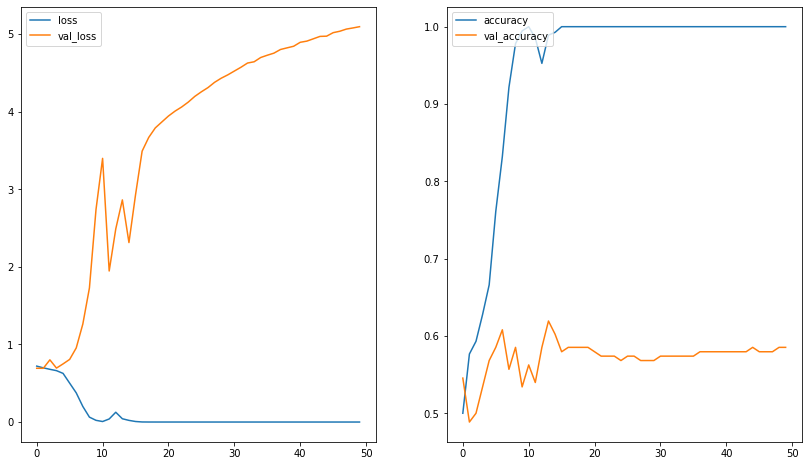

In [10]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

***
## A Model with Augmentation

We have seen that the simple model introduced overfitting; let's see if adding augmentation removes overfitting.

### Instatiate the `ImgeDataGenerator`

In [11]:
train_gen_aug = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

val_gen = ImageDataGenerator(rescale = 1./255)

### Building the iterator

Let's build iterator for training and testing dataset.

In [12]:
train_iter = train_gen_aug.flow_from_directory(
    directory = train_dir,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True)

test_iter = val_gen.flow_from_directory(
    directory = test_dir,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 32)

Found 548 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


### Visualize the images



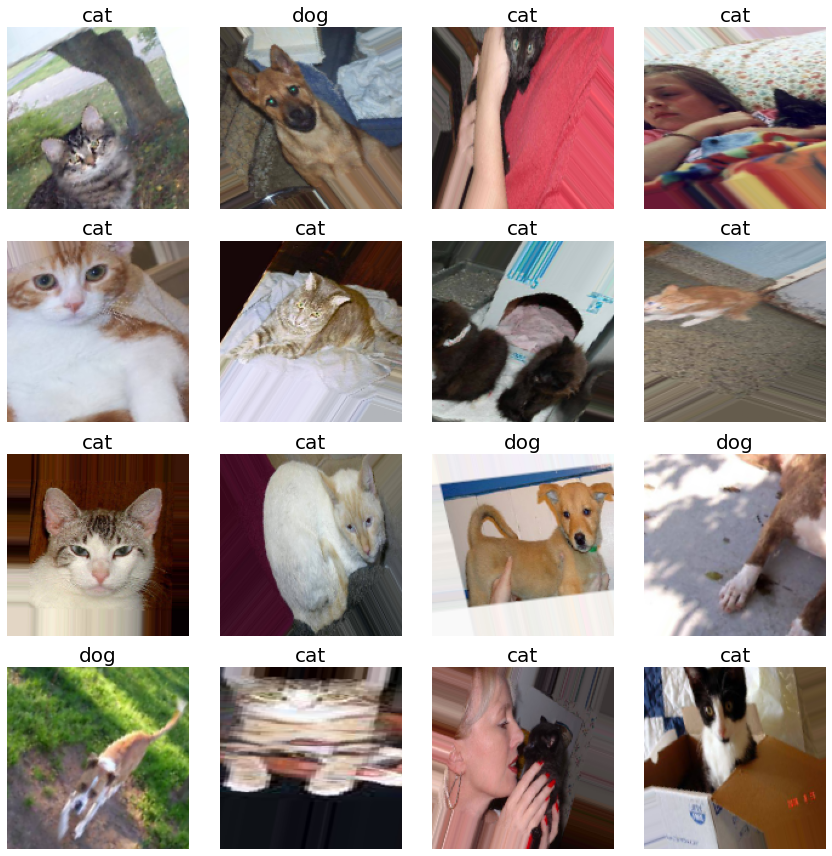

In [13]:
images, labels = train_iter.next()
class_names = ['cat', 'dog']
plt.figure(figsize = (12, 12))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(images[i])
  plt.title(class_names[int(labels[i])], fontsize = 20)
  plt.axis('off')

plt.tight_layout()


### Build the Model

Let's build a model.


In [14]:
model_aug = Sequential()

model_aug.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 input_shape = (150, 150, 3), data_format = 'channels_last',
                 activation = 'relu'))

model_aug.add(MaxPooling2D(2))

model_aug.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation = 'relu'))

model_aug.add(MaxPooling2D(2))

model_aug.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation = 'relu'))

model_aug.add(Flatten())
model_aug.add(Dense(units=264, activation='relu'))
model_aug.add(Dense(units=512, activation='relu'))
model_aug.add(Dense(units=1, activation = 'sigmoid'))
model_aug.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 43808)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 264)              

#### Compiling the Model

In [15]:
model_aug.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

#### Training the Model with Augmented Dataset

In [16]:
history_aug = model_aug.fit(train_iter, validation_data=test_iter, epochs = 50)

Epoch 1/50
18/18 [==============================] - 6s 299ms/step - loss: 0.7274 - accuracy: 0.5511 - val_loss: 0.7016 - val_accuracy: 0.5000
Epoch 2/50
18/18 [==============================] - 5s 287ms/step - loss: 0.6952 - accuracy: 0.5146 - val_loss: 0.7327 - val_accuracy: 0.5000
Epoch 3/50
18/18 [==============================] - 5s 298ms/step - loss: 0.7000 - accuracy: 0.4854 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/50
18/18 [==============================] - 6s 307ms/step - loss: 0.6931 - accuracy: 0.4982 - val_loss: 0.6928 - val_accuracy: 0.5114
Epoch 5/50
18/18 [==============================] - 6s 305ms/step - loss: 0.6926 - accuracy: 0.5255 - val_loss: 0.6926 - val_accuracy: 0.4943
Epoch 6/50
18/18 [==============================] - 6s 307ms/step - loss: 0.6947 - accuracy: 0.4927 - val_loss: 0.6925 - val_accuracy: 0.5170
Epoch 7/50
18/18 [==============================] - 6s 308ms/step - loss: 0.6935 - accuracy: 0.4745 - val_loss: 0.6927 - val_accuracy: 0.5170
Epoch 

#### Plotting History

By plotting history, it is clear that augmentation has minimized overfitting, though the model is exhibiting underfitting (neither performing well on the training dataset nor on the testing dataset). In later modules, we will see how overcome the problem of overfitting.

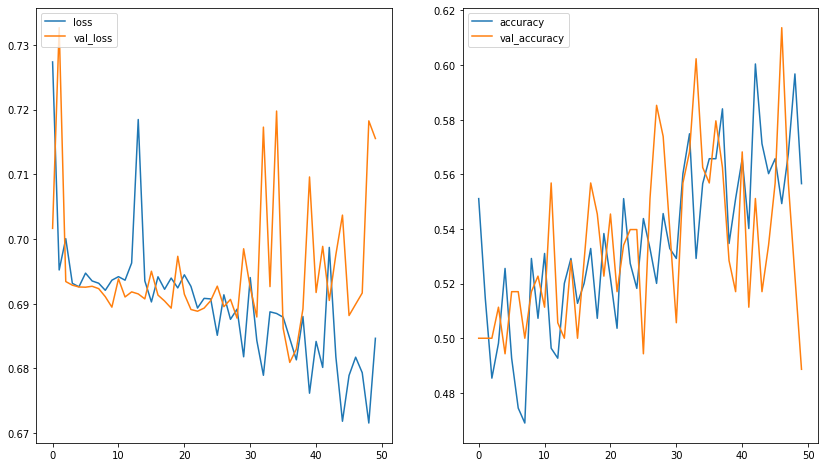

In [17]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.plot(history_aug.history['loss'], label='loss')
plt.plot(history_aug.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_aug.history['accuracy'],label='accuracy')
plt.plot(history_aug.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

***
## A Model with l1 Regularization

Let's build a model with l1 regularizatioin only.


### Building the Model

In [18]:
model_l1 = Sequential()

model_l1.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 input_shape = (150, 150, 3), data_format = 'channels_last',
                 activation = 'relu', kernel_regularizer= tf.keras.regularizers.l1(0.01)))
model_l1.add(MaxPooling2D(2))

model_l1.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation = 'relu',kernel_regularizer=  tf.keras.regularizers.l1(0.01)))

model_l1.add(MaxPooling2D(2))

model_l1.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation = 'relu', kernel_regularizer=  tf.keras.regularizers.l1(0.01)))

model_l1.add(Flatten())
model_l1.add(Dense(units=264, activation='relu', kernel_regularizer=  tf.keras.regularizers.l1(0.01)))
model_l1.add(Dense(units=512, activation='relu', kernel_regularizer=  tf.keras.regularizers.l1(0.01)))
model_l1.add(Dense(units=1, activation = 'sigmoid'))
model_l1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 43808)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 264)              

#### Compiling the Model

In [19]:
model_l1.compile(
    optimizer = tf.keras.optimizers.RMSprop(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

#### Training the Model Using L1 Regularization

In [20]:
history_l1 = model_l1.fit(train_it, validation_data = test_it, epochs = 50)

Epoch 1/50
18/18 [==============================] - 4s 184ms/step - loss: 203.8292 - accuracy: 0.5310 - val_loss: 103.5559 - val_accuracy: 0.5000
Epoch 2/50
18/18 [==============================] - 3s 169ms/step - loss: 88.7033 - accuracy: 0.4635 - val_loss: 77.1642 - val_accuracy: 0.5000
Epoch 3/50
18/18 [==============================] - 3s 168ms/step - loss: 70.2824 - accuracy: 0.4854 - val_loss: 64.8908 - val_accuracy: 0.5000
Epoch 4/50
18/18 [==============================] - 3s 167ms/step - loss: 61.8293 - accuracy: 0.5036 - val_loss: 59.8238 - val_accuracy: 0.5000
Epoch 5/50
18/18 [==============================] - 3s 170ms/step - loss: 58.7154 - accuracy: 0.4818 - val_loss: 57.4555 - val_accuracy: 0.5000
Epoch 6/50
18/18 [==============================] - 3s 169ms/step - loss: 53.4535 - accuracy: 0.4854 - val_loss: 47.5966 - val_accuracy: 0.5000
Epoch 7/50
18/18 [==============================] - 3s 169ms/step - loss: 44.4027 - accuracy: 0.4818 - val_loss: 42.2851 - val_accurac

#### Plotting Loss and Accuracy Plots

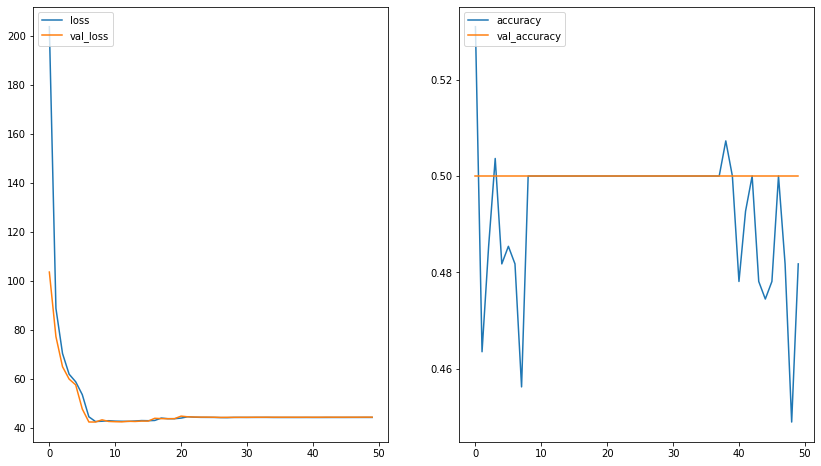

In [21]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.plot(history_l1.history['loss'], label='loss')
plt.plot(history_l1.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_l1.history['accuracy'],label='accuracy')
plt.plot(history_l1.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

## A Model with L2 Regularization
Let's build a model with L2 regularizatioin only.

### Building the Model

In [22]:
model_l2 = Sequential()

model_l2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 input_shape = (150, 150, 3), data_format = 'channels_last',
                 activation = 'relu', kernel_regularizer= tf.keras.regularizers.l2(0.01)))
model_l2.add(MaxPooling2D(2))

model_l2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation = 'relu',  kernel_regularizer= tf.keras.regularizers.l2(0.01)))

model_l2.add(MaxPooling2D(2))

model_l2.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation = 'relu',  kernel_regularizer= tf.keras.regularizers.l2(0.01)))

model_l2.add(Flatten())
model_l2.add(Dense(units=264, activation='relu', kernel_regularizer=  tf.keras.regularizers.l2(0.01)))
model_l2.add(Dense(units=512, activation='relu', kernel_regularizer=  tf.keras.regularizers.l2(0.01)))
model_l2.add(Dense(units=1, activation = 'sigmoid'))
model_l2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 32)        18464     
_________________________________________________________________
flatten_3 (Flatten)          (None, 43808)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 264)              

#### Compiling the Model

In [23]:
model_l2.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

#### Training the Model Using L2 Regularization

In [24]:
history_l2 = model_l2.fit(train_it, validation_data = test_it, epochs = 50)

Epoch 1/50
18/18 [==============================] - 4s 170ms/step - loss: 5.7468 - accuracy: 0.4854 - val_loss: 3.5828 - val_accuracy: 0.5000
Epoch 2/50
18/18 [==============================] - 3s 172ms/step - loss: 2.7214 - accuracy: 0.4836 - val_loss: 1.9555 - val_accuracy: 0.5000
Epoch 3/50
18/18 [==============================] - 3s 166ms/step - loss: 1.5989 - accuracy: 0.5000 - val_loss: 1.2594 - val_accuracy: 0.5000
Epoch 4/50
18/18 [==============================] - 3s 168ms/step - loss: 1.0965 - accuracy: 0.5000 - val_loss: 0.9467 - val_accuracy: 0.5000
Epoch 5/50
18/18 [==============================] - 3s 167ms/step - loss: 0.8690 - accuracy: 0.5000 - val_loss: 0.8085 - val_accuracy: 0.5000
Epoch 6/50
18/18 [==============================] - 3s 167ms/step - loss: 0.7768 - accuracy: 0.5000 - val_loss: 0.7483 - val_accuracy: 0.5000
Epoch 7/50
18/18 [==============================] - 3s 167ms/step - loss: 0.7348 - accuracy: 0.5000 - val_loss: 0.7218 - val_accuracy: 0.5000
Epoch 

#### Plotting Loss and Accuracy Plots

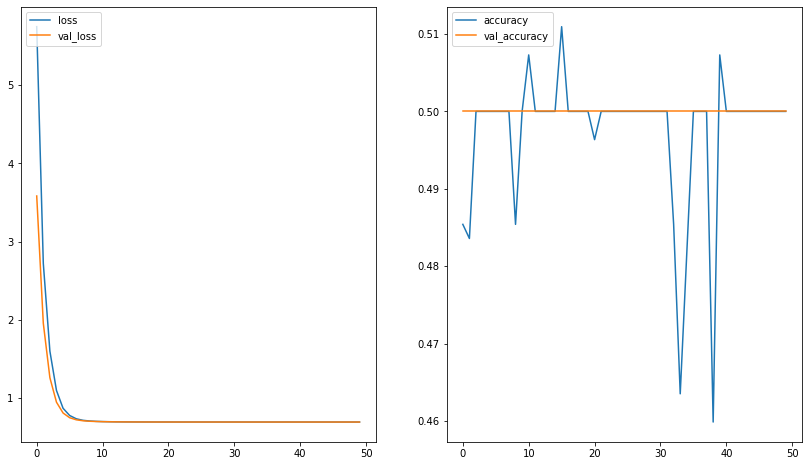

In [25]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.plot(history_l2.history['loss'], label='loss')
plt.plot(history_l2.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_l2.history['accuracy'],label='accuracy')
plt.plot(history_l2.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

## A Model with L1 and L2 Regularization
Let's build a model with L2 regularizatioins.

### Building the Model

In [26]:
model_l1l2 = Sequential()

model_l1l2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 input_shape = (150, 150, 3), data_format = 'channels_last',
                 activation = 'relu', kernel_regularizer= tf.keras.regularizers.l1_l2()))
model_l1l2.add(MaxPooling2D(2))

model_l1l2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation = 'relu',  kernel_regularizer= tf.keras.regularizers.l1_l2()))

model_l1l2.add(MaxPooling2D(2))

model_l1l2.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation = 'relu',  kernel_regularizer= tf.keras.regularizers.l1_l2()))

model_l1l2.add(Flatten())
model_l1l2.add(Dense(units=264, activation='relu', kernel_regularizer=  tf.keras.regularizers.l1_l2()))
model_l1l2.add(Dense(units=512, activation='relu', kernel_regularizer=  tf.keras.regularizers.l1_l2()))
model_l1l2.add(Dense(units=1, activation = 'sigmoid'))
model_l1l2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 64)        73792     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 32)        18464     
_________________________________________________________________
flatten_4 (Flatten)          (None, 43808)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 264)              

#### Compiling the Model

In [27]:
model_l1l2.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy'])

#### Training the Model Using L1 and L2 Regularization

In [28]:
history_l1l2 = model_l1l2.fit(train_it, validation_data = test_it, epochs = 50)

Epoch 1/50
18/18 [==============================] - 4s 185ms/step - loss: 313.6653 - accuracy: 0.4891 - val_loss: 141.1217 - val_accuracy: 0.5000
Epoch 2/50
18/18 [==============================] - 3s 173ms/step - loss: 88.7893 - accuracy: 0.4964 - val_loss: 59.2194 - val_accuracy: 0.5000
Epoch 3/50
18/18 [==============================] - 3s 168ms/step - loss: 42.6097 - accuracy: 0.5000 - val_loss: 31.2323 - val_accuracy: 0.5000
Epoch 4/50
18/18 [==============================] - 3s 162ms/step - loss: 25.1684 - accuracy: 0.5000 - val_loss: 19.7676 - val_accuracy: 0.5000
Epoch 5/50
18/18 [==============================] - 3s 159ms/step - loss: 17.9999 - accuracy: 0.4708 - val_loss: 17.3492 - val_accuracy: 0.5000
Epoch 6/50
18/18 [==============================] - 3s 157ms/step - loss: 16.6626 - accuracy: 0.5109 - val_loss: 16.2690 - val_accuracy: 0.5000
Epoch 7/50
18/18 [==============================] - 3s 167ms/step - loss: 16.2528 - accuracy: 0.5000 - val_loss: 17.1340 - val_accurac

#### Plotting Loss and Accuracy Plots

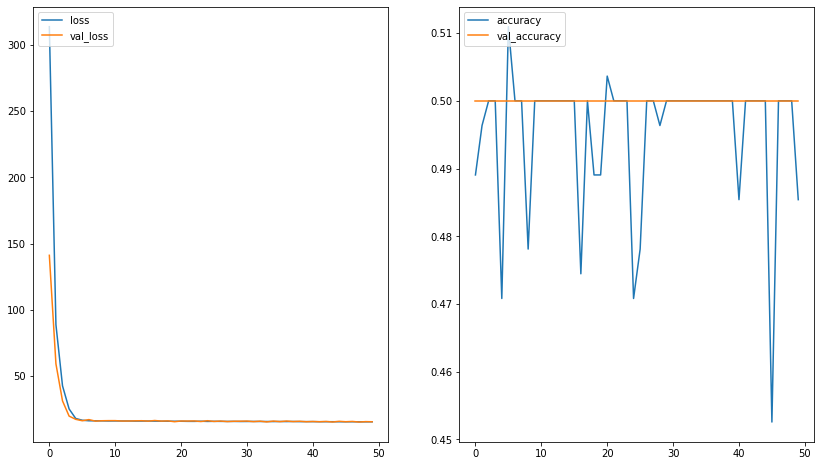

In [29]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.plot(history_l1l2.history['loss'], label='loss')
plt.plot(history_l1l2.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_l1l2.history['accuracy'],label='accuracy')
plt.plot(history_l1l2.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

## A Model with Dropout Regularization
Let's build a model with Dropout regularizatioin only.

### Building the Model

In [30]:
model_dropout = Sequential()

model_dropout.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 input_shape = (150, 150, 3), data_format = 'channels_last',
                 activation = 'relu'))
model_dropout.add(Dropout(rate = 0.5))
model_dropout.add(MaxPooling2D(2))

model_dropout.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation = 'relu'))
model_dropout.add(Dropout(rate = 0.5))
model_dropout.add(MaxPooling2D(2))

model_dropout.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation = 'relu'))
model_dropout.add(Dropout(rate = 0.5))
model_dropout.add(Flatten())
model_dropout.add(Dense(units=264, activation='relu'))
model_dropout.add(Dropout(rate = 0.5))
model_dropout.add(Dense(units=512, activation='relu'))
model_dropout.add(Dropout(rate = 0.5))
model_dropout.add(Dense(units=1, activation = 'sigmoid'))
model_dropout.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 150, 150, 128)     3584      
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 128)     0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 64)        73792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 37, 37, 32)       

#### Compiling the Model

In [31]:
model_dropout.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy'])

#### Training the Model Using Dropout Regularization

In [32]:
history_dropout = model_dropout.fit(train_it, validation_data = test_it, epochs = 50)

Epoch 1/50
18/18 [==============================] - 4s 185ms/step - loss: 0.8334 - accuracy: 0.5109 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/50
18/18 [==============================] - 3s 174ms/step - loss: 0.6959 - accuracy: 0.5219 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/50
18/18 [==============================] - 3s 175ms/step - loss: 0.6905 - accuracy: 0.5511 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/50
18/18 [==============================] - 3s 181ms/step - loss: 0.6890 - accuracy: 0.5529 - val_loss: 0.6921 - val_accuracy: 0.5057
Epoch 5/50
18/18 [==============================] - 3s 174ms/step - loss: 0.6691 - accuracy: 0.5712 - val_loss: 0.6795 - val_accuracy: 0.6023
Epoch 6/50
18/18 [==============================] - 3s 172ms/step - loss: 0.6199 - accuracy: 0.6533 - val_loss: 0.6711 - val_accuracy: 0.5852
Epoch 7/50
18/18 [==============================] - 3s 175ms/step - loss: 0.5520 - accuracy: 0.7208 - val_loss: 0.6816 - val_accuracy: 0.5455
Epoch 

#### Plotting Loss and Accuracy Plots

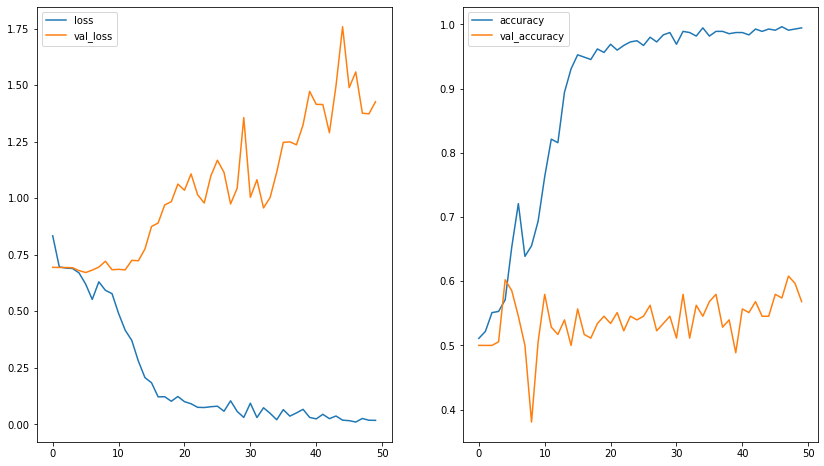

In [33]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.plot(history_dropout.history['loss'], label='loss')
plt.plot(history_dropout.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_dropout.history['accuracy'],label='accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

## A Model with BatchNormalization Regularization
Let's build a model with BatchNormalization regularizatioin only.

### Building the Model

In [34]:
model_BN = Sequential()

model_BN.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 input_shape = (150, 150, 3), data_format = 'channels_last',
                 activation = 'relu'))

model_BN.add(BatchNormalization())
model_BN.add(MaxPooling2D(2))

model_BN.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation = 'relu'))
model_BN.add(BatchNormalization())
model_BN.add(MaxPooling2D(2))

model_BN.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation = 'relu'))
model_BN.add(BatchNormalization())
model_BN.add(Flatten())
model_BN.add(Dense(units=264, activation='relu'))
model_BN.add(BatchNormalization())
model_BN.add(Dense(units=512, activation='relu'))
model_BN.add(BatchNormalization())
model_BN.add(Dense(units=1, activation = 'sigmoid'))
model_BN.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 150, 150, 128)     3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 128)     512       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 64)        73792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 37, 37, 32)       

#### Compiling the Model

In [35]:
model_BN.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy'])

#### Training the Model Using BatchNormalization Regularization

In [36]:
history_BN = model_BN.fit(train_it, validation_data = test_it, epochs = 50)

Epoch 1/50
18/18 [==============================] - 4s 185ms/step - loss: 1.0296 - accuracy: 0.5657 - val_loss: 0.7003 - val_accuracy: 0.5284
Epoch 2/50
18/18 [==============================] - 3s 164ms/step - loss: 0.5595 - accuracy: 0.7226 - val_loss: 0.7809 - val_accuracy: 0.5000
Epoch 3/50
18/18 [==============================] - 3s 171ms/step - loss: 0.3446 - accuracy: 0.8449 - val_loss: 1.4515 - val_accuracy: 0.5000
Epoch 4/50
18/18 [==============================] - 3s 165ms/step - loss: 0.1964 - accuracy: 0.9416 - val_loss: 1.0734 - val_accuracy: 0.4943
Epoch 5/50
18/18 [==============================] - 3s 164ms/step - loss: 0.1238 - accuracy: 0.9672 - val_loss: 2.7299 - val_accuracy: 0.5000
Epoch 6/50
18/18 [==============================] - 3s 162ms/step - loss: 0.1106 - accuracy: 0.9690 - val_loss: 3.3005 - val_accuracy: 0.5000
Epoch 7/50
18/18 [==============================] - 3s 163ms/step - loss: 0.0875 - accuracy: 0.9708 - val_loss: 4.7291 - val_accuracy: 0.5000
Epoch 

#### Plotting Loss and Accuracy Plots

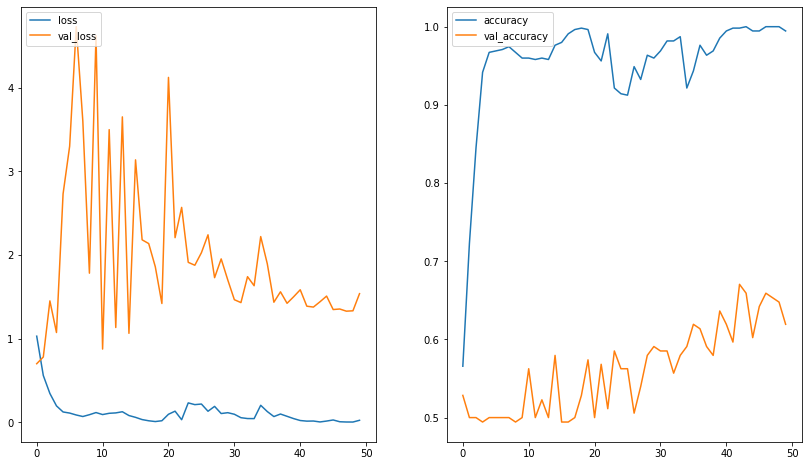

In [37]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.plot(history_BN.history['loss'], label='loss')
plt.plot(history_BN.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_BN.history['accuracy'],label='accuracy')
plt.plot(history_BN.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

## A Model with Regularization
Let's build a model, which involves all the regularization we have discussed so far.

### Building the Model

In [38]:
model_final = Sequential()

model_final.add(Conv2D(filters=128, kernel_size=(3,3), padding='same',
                 input_shape = (150, 150, 3), data_format = 'channels_last',
                 activation = 'relu', kernel_regularizer= tf.keras.regularizers.l1_l2()))

model_final.add(BatchNormalization())
model_dropout.add(Dropout(rate = 0.5))
model_final.add(MaxPooling2D(2))

model_final.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 activation = 'relu',  kernel_regularizer= tf.keras.regularizers.l1_l2()))
model_final.add(BatchNormalization())
model_dropout.add(Dropout(rate = 0.5))
model_final.add(MaxPooling2D(2))

model_final.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation = 'relu',  kernel_regularizer= tf.keras.regularizers.l1_l2()))
model_final.add(BatchNormalization())
model_dropout.add(Dropout(rate = 0.5))
model_final.add(Flatten())
model_final.add(Dense(units=264, activation='relu', kernel_regularizer=  tf.keras.regularizers.l1_l2()))
model_final.add(BatchNormalization())
model_dropout.add(Dropout(rate = 0.5))
model_final.add(Dense(units=512, activation='relu', kernel_regularizer=  tf.keras.regularizers.l1_l2()))
model_final.add(BatchNormalization())
model_dropout.add(Dropout(rate = 0.5))
model_final.add(Dense(units=1, activation = 'sigmoid'))
model_final.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 150, 150, 128)     3584      
_________________________________________________________________
batch_normalization_5 (Batch (None, 150, 150, 128)     512       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 75, 75, 64)        73792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 37, 37, 32)       

#### Compiling the Model

In [39]:
model_final.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy'])

#### Training the Model Using all the Regularizations

In [40]:
history_final = model_final.fit(train_iter, validation_data = test_iter, epochs = 50)

Epoch 1/50
18/18 [==============================] - 7s 333ms/step - loss: 355.0914 - accuracy: 0.5511 - val_loss: 179.2915 - val_accuracy: 0.5057
Epoch 2/50
18/18 [==============================] - 6s 305ms/step - loss: 129.9491 - accuracy: 0.5712 - val_loss: 101.6419 - val_accuracy: 0.5227
Epoch 3/50
18/18 [==============================] - 5s 293ms/step - loss: 84.5936 - accuracy: 0.5128 - val_loss: 74.3032 - val_accuracy: 0.5000
Epoch 4/50
18/18 [==============================] - 5s 296ms/step - loss: 67.7500 - accuracy: 0.5219 - val_loss: 69.0200 - val_accuracy: 0.5000
Epoch 5/50
18/18 [==============================] - 5s 297ms/step - loss: 71.5189 - accuracy: 0.5292 - val_loss: 69.7515 - val_accuracy: 0.5000
Epoch 6/50
18/18 [==============================] - 5s 293ms/step - loss: 58.5650 - accuracy: 0.5328 - val_loss: 62.3164 - val_accuracy: 0.5000
Epoch 7/50
18/18 [==============================] - 5s 294ms/step - loss: 56.3734 - accuracy: 0.5237 - val_loss: 46.8199 - val_accur

#### Plotting Loss and Accuracy Plots

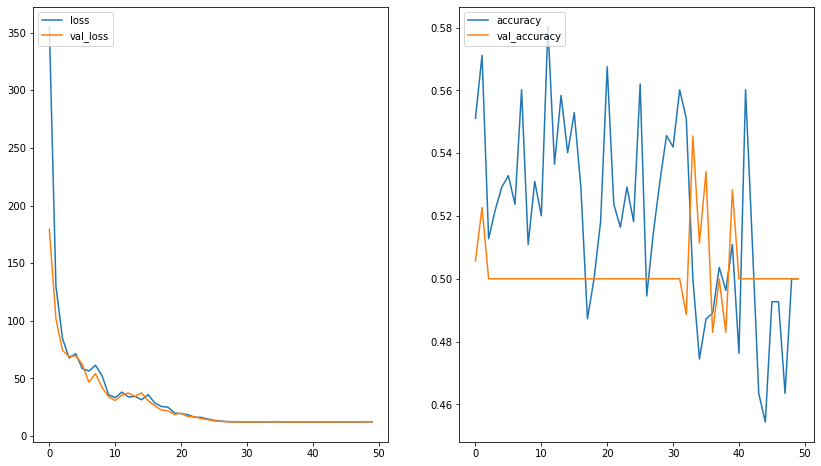

In [41]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
plt.plot(history_final.history['loss'], label='loss')
plt.plot(history_final.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_final.history['accuracy'],label='accuracy')
plt.plot(history_final.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='upper left')
plt.show()

***
**We have seen almost all the stretegies were able to remove the difference between validation and training loss; in other words, overfitting. However, models still exhibit underfitting, in the few comming modules, we will study how to cater the problem of under-fitting.**
***

# References

1. [Regularization with TensorFlow](https://www.ritchieng.com/machine-learning/deep-learning/tensorflow/regularization/)
2. [tf.keras.regularizers.Regularizer](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer)
3. [Overfit and underfit](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)
4. [Reguaralization](https://www.kdnuggets.com/2020/08/tensorflow-model-regularization-techniques.html)
5. [Regularization in TensorFlow using Keras API](https://medium.com/@robertjohn_15390/regularization-in-tensorflow-using-keras-api-48aba746ae21)
6. [Regularization Techniques And Their Implementation In TensorFlow(Keras)](https://towardsdatascience.com/regularization-techniques-and-their-implementation-in-tensorflow-keras-c06e7551e709)
7. [How To Implement Custom Regularization in TensorFlow(Keras)](https://towardsdatascience.com/how-to-implement-custom-regularization-in-tensorflow-keras-4e77be082918)
8. [Regularization techniques for image processing using TensorFlow](https://heartbeat.fritz.ai/regularization-techniques-for-image-processing-using-tensorflow-56c5b365bc17)